<a href="https://colab.research.google.com/github/Aadiv1999/reconstruct_3D/blob/main/3D_Reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving im0.png to im0.png
Saving im1.png to im1.png


In [3]:
im_l = cv2.imread("/content/im0.png")
im_r = cv2.imread("/content/im1.png")
img_l_gray = cv2.cvtColor(im_l, cv2.COLOR_BGR2GRAY)
img_r_gray = cv2.cvtColor(im_r, cv2.COLOR_BGR2GRAY)

In [4]:
stereo = cv2.StereoBM_create(numDisparities=192, blockSize=15)
disparity = stereo.compute(img_l_gray,img_r_gray)

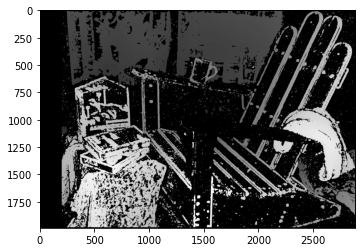

In [5]:
plt.imshow(disparity,"gray")
plt.show()

In [6]:
b = 193.001
f = 3997.684

In [7]:
depth = f*disparity/b

In [60]:
cv2.applyColorMap(depth, cv2.COLORMAP_JET)


error: ignored

In [8]:
import numpy as np
cv2.normalize(depth,depth,0,255,cv2.NORM_MINMAX)
depth_arr = np.asarray(depth, dtype=np.uint8)
print(depth_arr.dtype)
# depth.convertto()
heatmap = cv2.applyColorMap(depth_arr, cv2.COLORMAP_HOT)

uint8


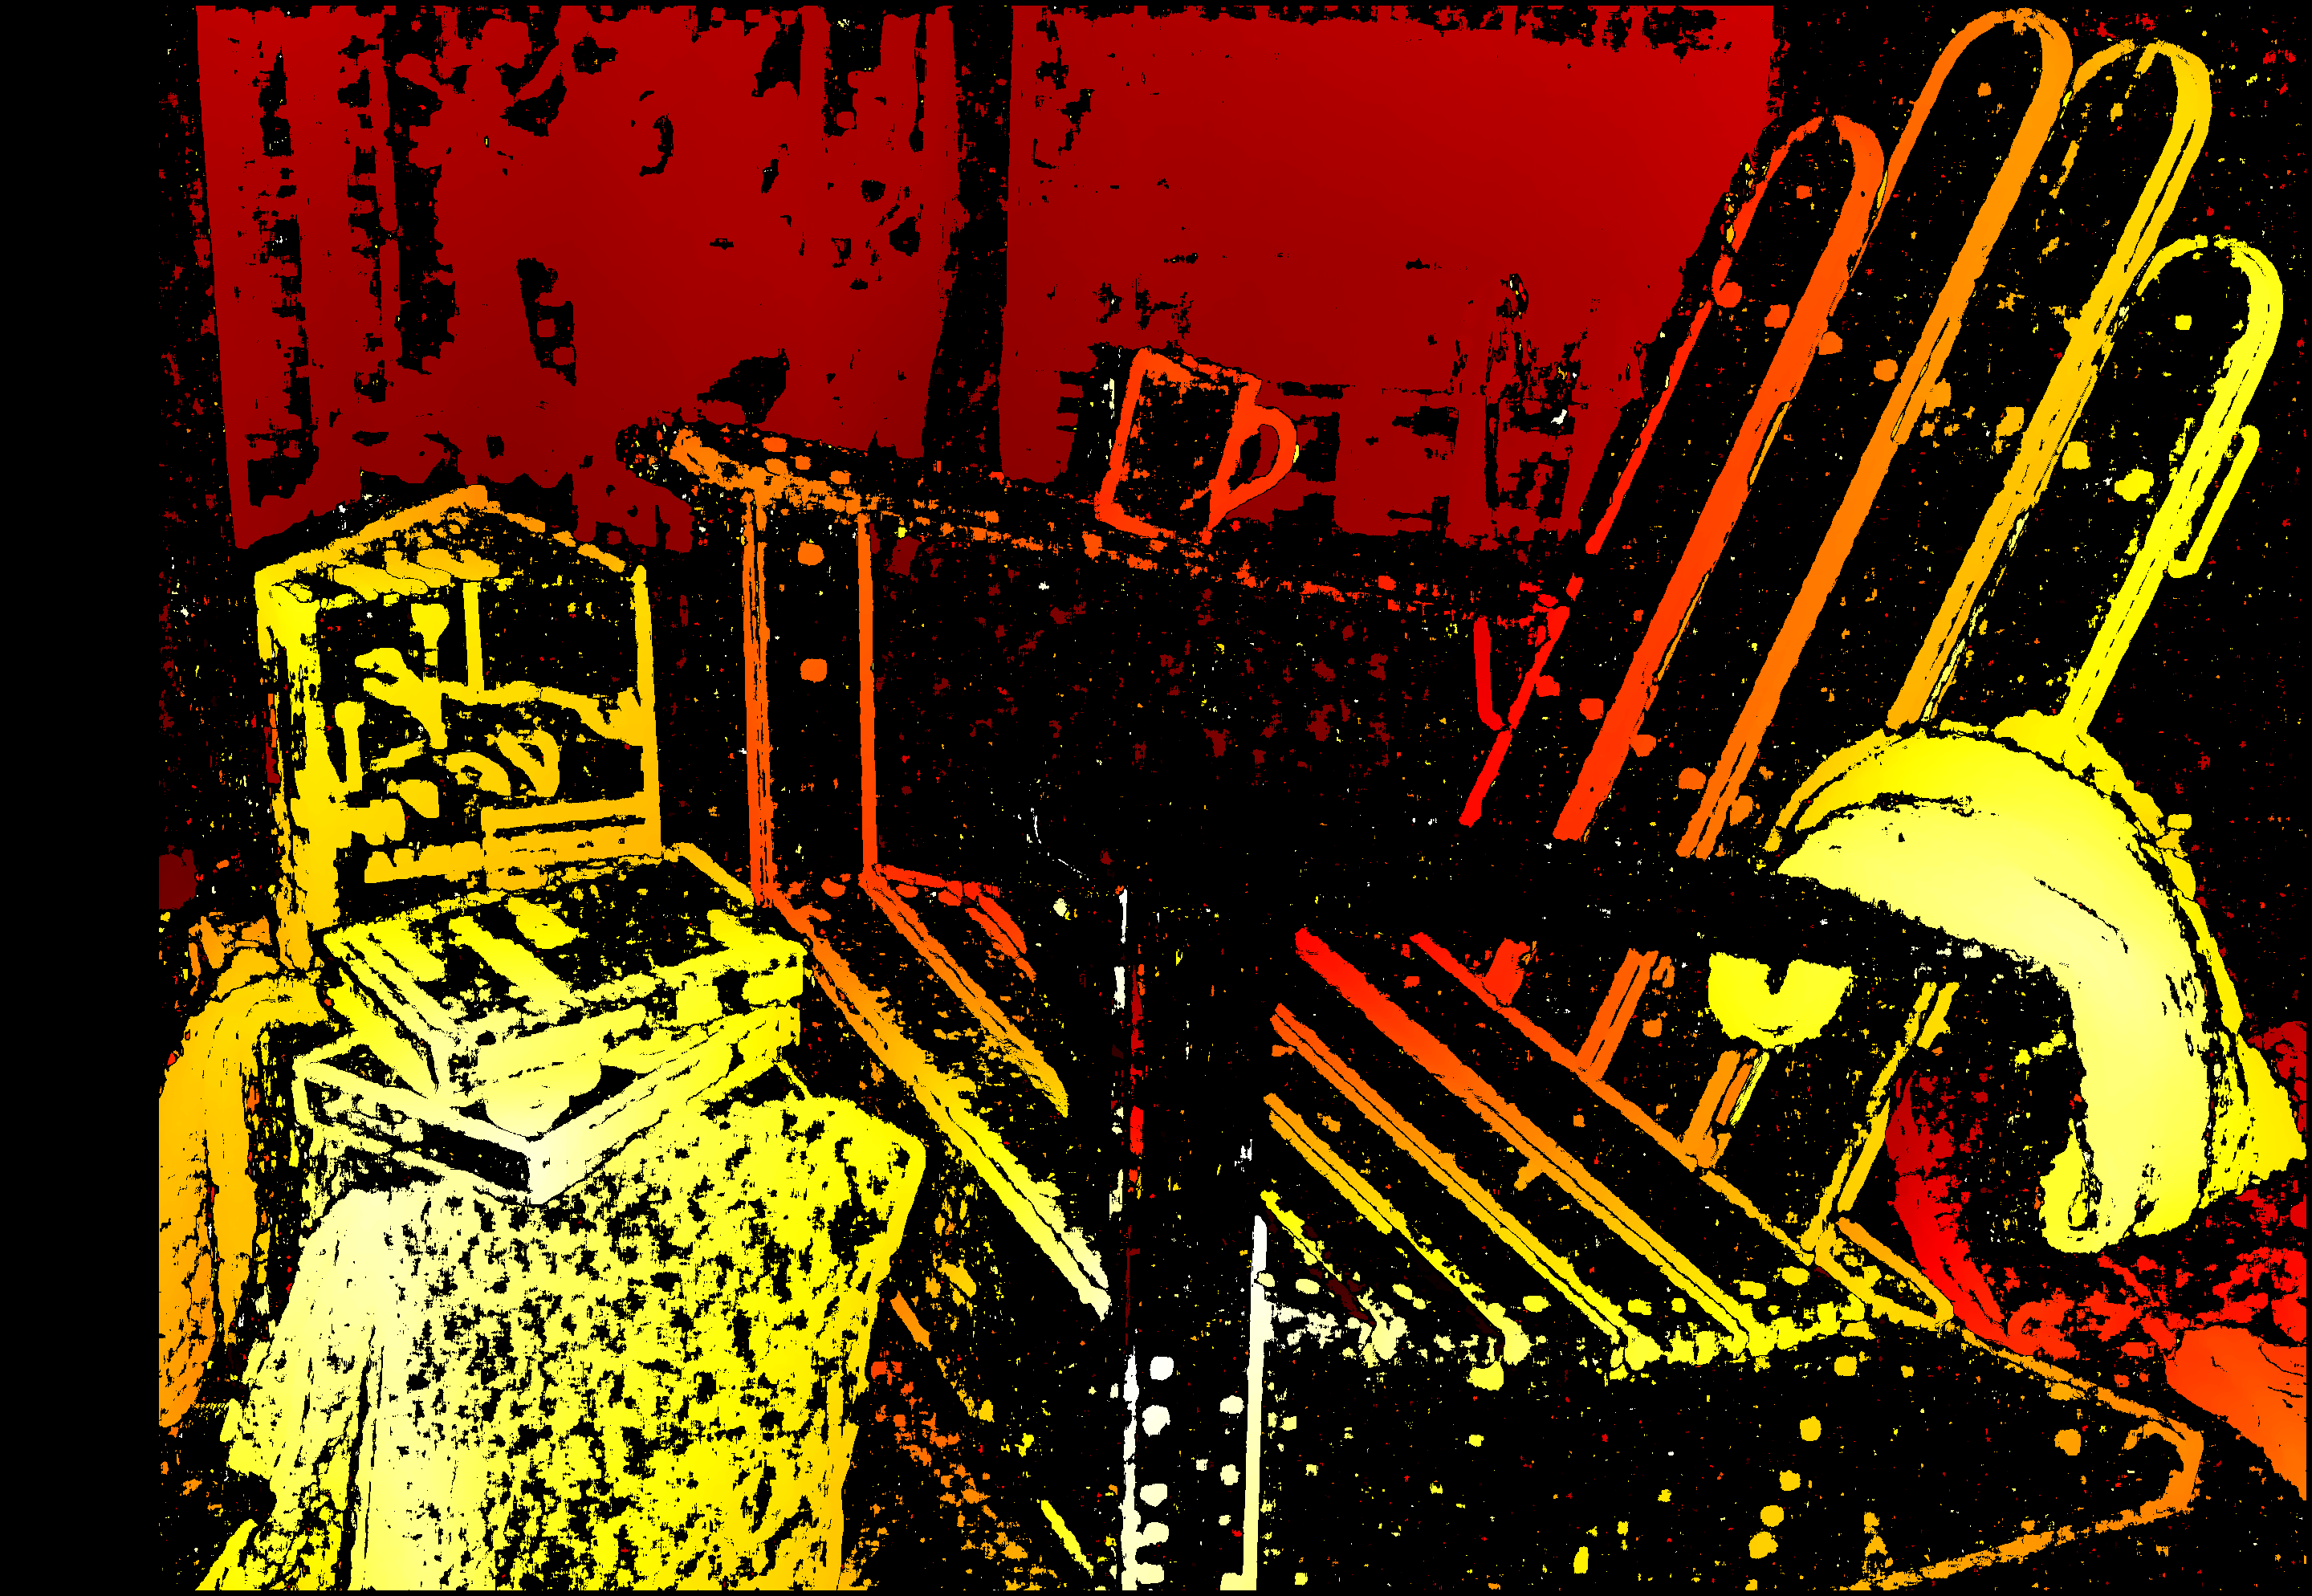

In [9]:
cv2_imshow(heatmap)

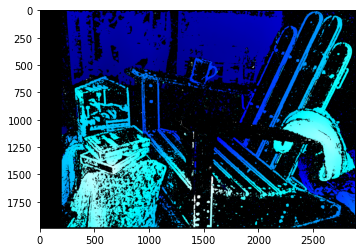

In [10]:
plt.imshow(heatmap,"inferno")
plt.show()

In [14]:
!pip install open3d==0.12.0
import open3d as o3d
depth_o3d = o3d.geometry.Image((depth_arr).astype(np.uint8))
im_o3d = o3d.geometry.Image((im_l).astype(np.uint8))
rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(im_o3d, depth_o3d, convert_rgb_to_intensity = False)


In [38]:
# from open3d import *
# pinhole_camera_intrinsic = [[3997.684, 0, 1176.728], [0, 3997.684, 1011.728], [0, 0, 1]]
print(depth.shape)
pinhole_camera_intrinsic = o3d.camera.PinholeCameraIntrinsic(int(depth.shape[0]),int(depth.shape[1]),float(3997.684),float(3997.684),float(1176.728),float(1011.728))
# print()
pcd =  o3d.geometry.PointCloud.create_from_rgbd_image(rgbd, pinhole_camera_intrinsic)
# pcd.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
o3d.io.write_point_cloud("pointcloudnew3.pcd",pcd)


(1988, 2880)


True